# Netflix Exploartory Data Analysis (EDA)

## Packages

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("raw_data/netflix_titles.csv")

## Exploring the Data Frame

In [106]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [107]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Identifying Missing Values

In [109]:
df.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

The dataset contains missing values primarily in the director, cast, and country columns. A smaller number of missing values appear in rating, date_added, and duration. These are best filled with a placeholder such as "Unknown" to preserve the dataset size and maintain comparability across records.

## Replacing missing values 

In [110]:
df["country"] = df["country"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["director"] = df["director"].fillna("Unknown")
df["date_added"] = df["date_added"].fillna("Unknown")
df["rating"] = df["rating"].fillna("Unknown")
df["duration"] = df["duration"].fillna("Unknown")


In [111]:
df.isna().sum().sort_values(ascending=False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

At this stagee all missing values have been replaced with a placeholder, but they can still affect the results of the analysis. For instance, the large amount of gaps in the director column will impact the validity of the Top 10 Directors By The Amount of Films Produced plot

## Films vs TV Shows

In [118]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [120]:
films_vs_tv = df["type"].value_counts(normalize=True) * 100
print(films_vs_tv)

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


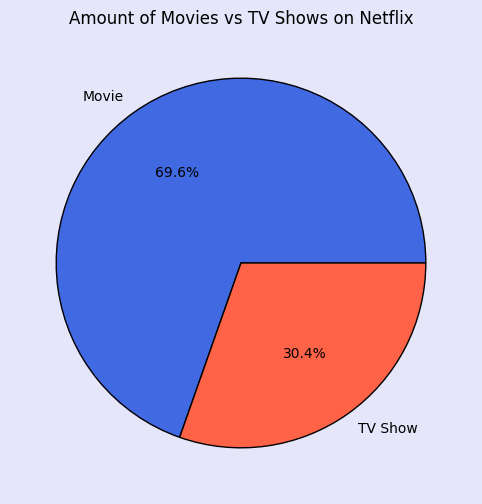

In [122]:
plt.figure(figsize = (8,6), facecolor="lavender")
plt.pie(films_vs_tv.values, labels=films_vs_tv.index, autopct="%1.1f%%", colors = ['royalblue','tomato'], wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title("Amount of Movies vs TV Shows on Netflix")
plt.show()

Is not affected by missing values

## Films and TV Shows by Country

In [112]:
fntv_by_country = df["country"][~df["country"].isin(["Unknown"])].value_counts(normalize = True) * 100
print(fntv_by_country)
# % of films and TV produced by a country that was available on Netflix (2008 - 2021)

country
United States                                    35.330993
India                                            12.186560
United Kingdom                                    5.253260
Japan                                             3.071715
South Korea                                       2.494985
                                                   ...    
Russia, Spain                                     0.012538
Croatia, Slovenia, Serbia, Montenegro             0.012538
Japan, Canada                                     0.012538
United States, France, South Korea, Indonesia     0.012538
United Arab Emirates, Jordan                      0.012538
Name: proportion, Length: 748, dtype: float64


This displays % of films and TV produced by each country that was available on Netflix 2008 - 2021 excluding the "Unknown" values. The decision to remove "Unknown" values was made to ensure the results more accurate as these values would distort the proportions and reduce the realiability of the comparison between countries.

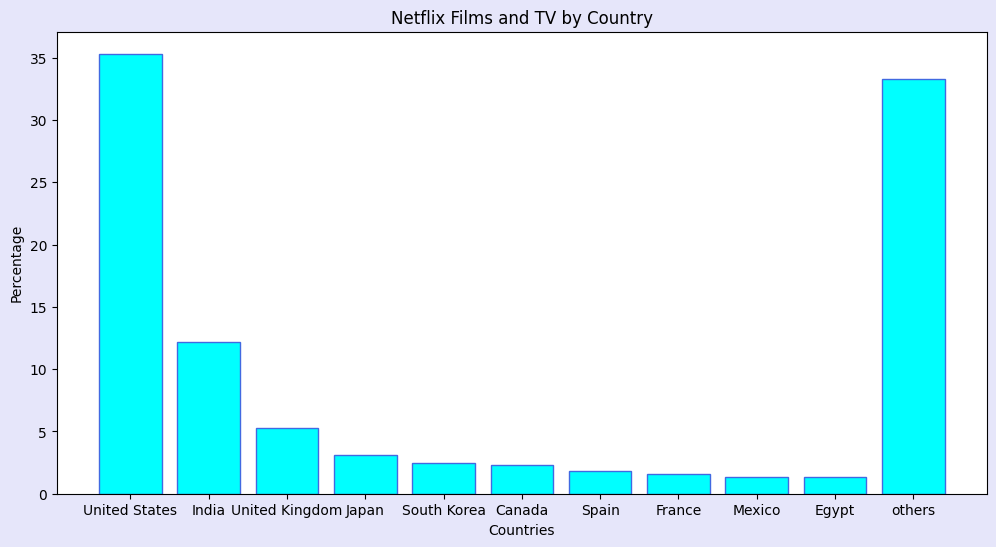

In [113]:
top_10 = fntv_by_country.head(10)
other_c = fntv_by_country.iloc[10:].sum()
top_10["others"] = other_c
plt.figure(figsize = (12,6), facecolor = "lavender")
plt.bar(top_10.index, top_10.values, color = 'cyan', edgecolor = "royalblue")
plt.xlabel("Countries")
plt.ylabel("Percentage")
plt.title("Netflix Films and TV by Country")
plt.show()


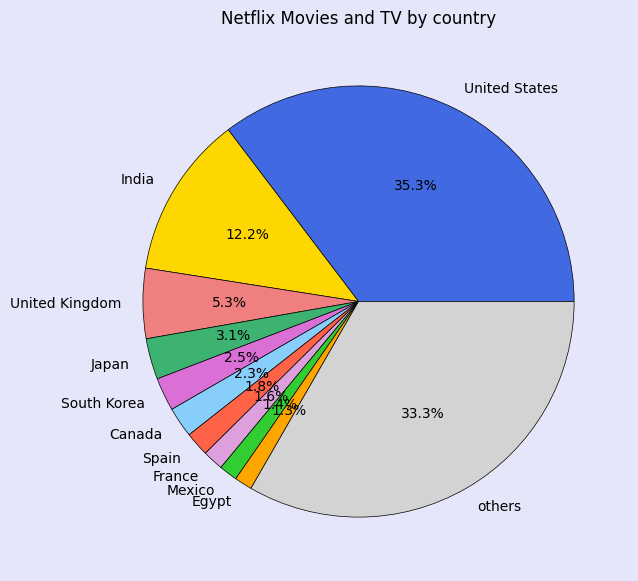

In [114]:
top_10c = fntv_by_country.head(10)
other_c = fntv_by_country.iloc[10:].sum()
top_10c["others"] = other_c
plt.figure(figsize = (12,7), facecolor="lavender")
plt.pie(top_10c.values, labels=top_10c.index, autopct="%1.1f%%", colors = [
    'royalblue', 'gold', 'lightcoral', 'mediumseagreen', 'orchid',
    'lightskyblue', 'tomato', 'plum', 'limegreen', 'orange',
    'lightgray'
], wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title("Netflix Movies and TV by country")
plt.show()

## Films and TV Shows by Director

In [115]:
num_of_fntv_by_dir=df["director"][~df["director"].isin(["Unknown"])].value_counts()
print(num_of_fntv_by_dir)

director
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Marcus Raboy               16
Suhas Kadav                16
Jay Karas                  14
                           ..
Mu Chu                      1
Chandra Prakash Dwivedi     1
Majid Al Ansari             1
Peter Hewitt                1
Paul Raschid                1
Name: count, Length: 4528, dtype: int64


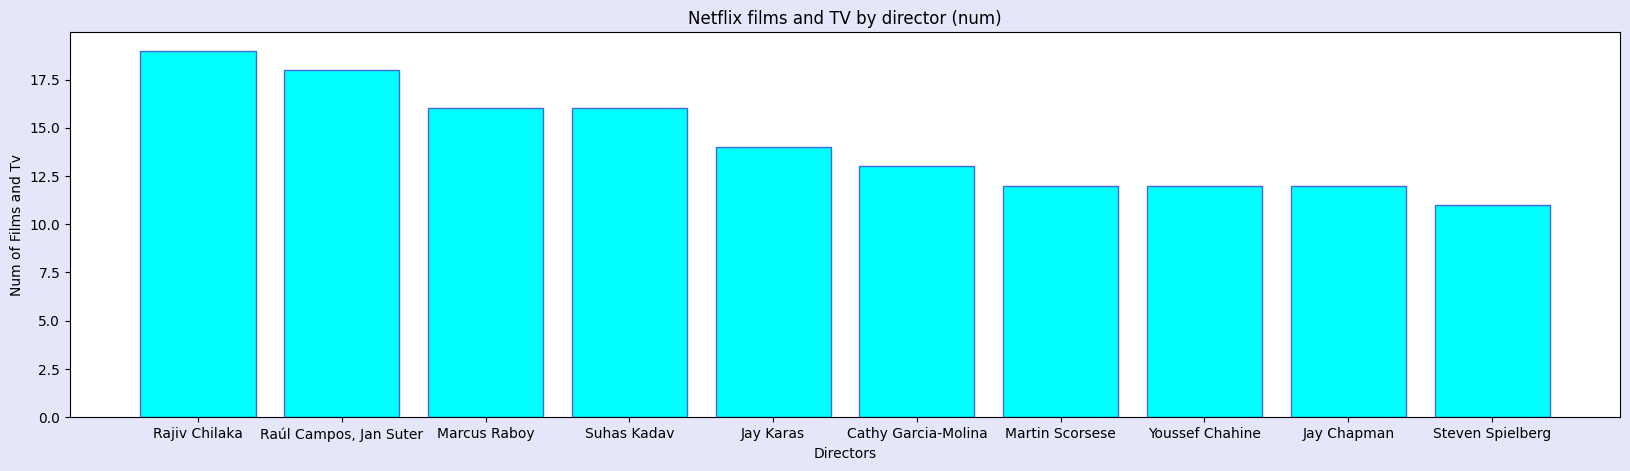

In [117]:
top10fpd = num_of_fntv_by_dir.head(10)

plt.figure(figsize = (20,5), facecolor="lavender")
plt.bar(top10fpd.index, top10fpd.values, color="cyan", edgecolor="royalblue")
plt.xlabel("Directors")
plt.ylabel("Num of Films and Tv")
plt.title("Netflix films and TV by director (num)")
plt.show()

The graph's proportions are significantly impacted by the absence of information in 2634 rows.